In [1]:
from rtree import index

# Создаем объект Property с настройками (например, для 2D)
prop = index.Property()
prop.dimension = 2

# Создаем индекс с использованием заданных свойств
idx = index.Index(properties=prop)

# Добавляем элемент в индекс с id=0 и bounding box (xmin, ymin, xmax, ymax)
idx.insert(0, (0.0, 0.0, 1.0, 1.0))

# При выполнении запроса мы можем получить элементы (Item)
for item in idx.intersection((0, 0, 1, 1), objects=True):
    print(item.id, item.bbox, item.object)


0 [0.0, 0.0, 1.0, 1.0] None


In [3]:
# Предположим, idx — наш индекс, а bbox — bounding box проверяемого объекта
bbox = (0.0, 0.0, 3.0, 3.0)
collision_ids = list(idx.intersection(bbox))

if collision_ids:
    print("Есть пересечение с объектами:", collision_ids)
else:
    print("Пересечений не найдено.")


Есть пересечение с объектами: [0]


In [14]:
import numpy as np
np.hstack(([0, 1, 2, 3], [0, 1, 2, 3]))
print(np.append([0, 1, 2, 3], [0, 1, 2, 3]))
print((1, 2, 3) + (1, 2, 3))


[0 1 2 3 0 1 2 3]
(1, 2, 3, 1, 2, 3)


In [16]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [29]:
# Создаем индекс и добавляем точки (для точек bbox выглядит как (x, y, x, y))
idx = index.Index()
node1 = Node(10, 10)
node2 = Node(20, 20)
node3 = Node(30, 30)
idx.insert(0, (10, 10, 10, 10), node1)
idx.insert(1, (20, 20, 20, 20), node2)
idx.insert(2, (30, 30, 30, 30), node3)

# Задаем точку запроса, например (15, 15)
query_point = (0, 15, 15, 15)

# Находим ближайшую точку (num_results=1 означает, что вернется только один ближайший элемент)
nearest = list(idx.nearest(query_point, 1, objects=True))

for item in nearest:
    print("ID:", item.id, "bbox:", item.bbox, item.object)

ID: 0 bbox: [10.0, 10.0, 10.0, 10.0] <__main__.Node object at 0x10580b470>


In [39]:
np.random.uniform(0, 1)

0.7151964292113375

### Shapely

In [ ]:
from shapely.geometry import LineString, Polygon

In [4]:
segment = LineString([(0, 0), (3, 2)])

# Задаём многоугольник (список вершин, последний автоматически связывается с первым)
poly = Polygon([
    (1, 1),
    (2, 1),
    (2, 2),
    (1, 2),
])

# Проверяем, пересекаются ли
if segment.intersects(poly):
    print("Отрезок и многоугольник пересекаются")
else:
    print("Не пересекаются")


Отрезок и многоугольник пересекаются


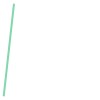

In [8]:
line = LineString([[0, 1], [1, 10]])
line